In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt 
import seaborn as sns

# Plot subtype density of cells ordered according to latent time

Plot either all samples, or choose to focus on a single sample by commenting the other paths in the list of paths to load

In [6]:
obs = pd.read_csv('../data/non_tumor_all_cells.csv', index_col=0, header=0)
subtype_col = 'SubType_Normal'

paths = [
    'scvelo_timevectors_normalA.csv',
    'scvelo_timevectors_normalB.csv',
    'scvelo_timevectors_normalC.csv',
    'scvelo_timevectors_normalD.csv',
]
normal_time = []
for pth in paths:
    x = pd.read_csv(pth, index_col=0, header=0)
    normal_time.append(x.copy())
    
normal_time = pd.concat(normal_time, axis=0)
print(normal_time.shape)

normal_time['subtype'] = obs.loc[normal_time.index, subtype_col]

(12819, 2)


# Figure 2e - density plot

Text(0.5, 1.0, 'library A')

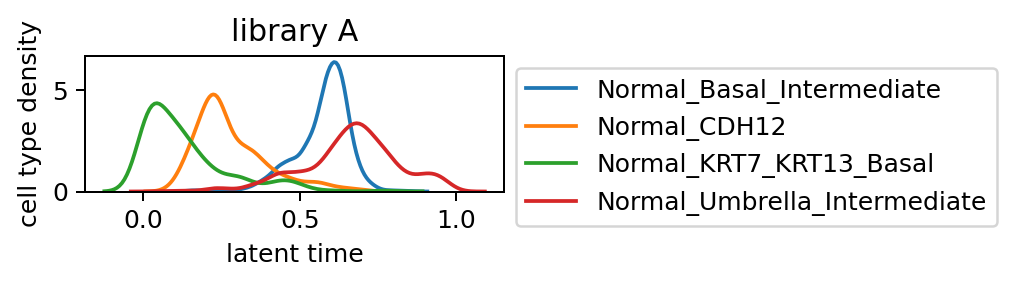

In [9]:
normal_time = normal_time.sort_values('latent_time')
subtypes = np.unique(normal_time['subtype'])
s = subtypes[0]
plt.figure(figsize=(3,1), dpi=180)
ax = plt.gca()
for s in subtypes:
    subtype_vector = normal_time.loc[normal_time.index.str.startswith('A') & (normal_time.subtype == s), 'latent_time'].values
    sns.kdeplot(subtype_vector, 
                label=s, 
                ax=ax)
plt.xlabel('latent time')
plt.ylabel('cell type density')
plt.legend(bbox_to_anchor=(1,1))
# plt.title(f'library A')

Text(0.5, 1.0, 'All healthy epithelial nuclei')

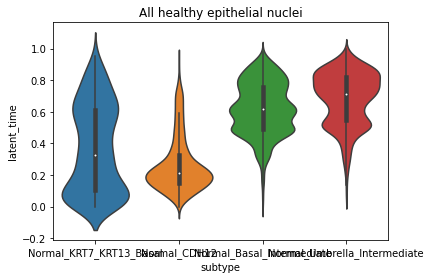

In [10]:
order = [
    'Normal_KRT7_KRT13_Basal', 
    'Normal_CDH12',
    'Normal_Basal_Intermediate', 
    'Normal_Umbrella_Intermediate'
]
sns.violinplot(data=normal_time, x = 'subtype', y = 'latent_time', scale='width', width=0.8, order=order)
plt.title(f'All healthy epithelial nuclei')
# plt.savefig(f'figures/normal_nn_latent_time_seabornViolin_noStrip_library{library}.svg', bbox_inches='tight')